Analise de RFV(Recência, Frequência e Valor): Este notebook realiza uma análise aprofundada da base de dados do kaggle(https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting) usando a técnica RFV (Recência, Frequência, Valor) e algoritmos de cluster. Exploramos padrões de compra dos clientes e identificamos grupos com comportamentos semelhantes. Os insights obtidos ajudarão a personalizar estratégias de marketing, melhorando a experiência do cliente e impulsionando o crescimento do negócio.

# Importações e carregamento da base de dados

In [125]:
# Tratamento de dados
import pandas as pd
import numpy as np

# EDA(analise exploratoria de dados)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dados
import calendar
from datetime import datetime

# Configs
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv('/content/drive/MyDrive/projetos /Analise de RFV: Superstore Sales Dataset/train.csv')
pd.set_option('display.max_columns', None)
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

So existem valores nulos na coluna referente ao codigo postal, mas como so vamos utilizar informações referentes a o ID do cliente, data de compra e valor da compra, essa coluna não importa para a anlise final

In [4]:
# Passando a coluna Order Date para DateTime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [5]:
sales.nunique().sort_values(ascending=False)

Row ID           9800
Sales            5757
Order ID         4922
Product ID       1861
Product Name     1849
Ship Date        1326
Order Date       1230
Customer ID       793
Customer Name     793
Postal Code       626
City              529
State              49
Sub-Category       17
Ship Mode           4
Region              4
Segment             3
Category            3
Country             1
dtype: int64

In [6]:
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


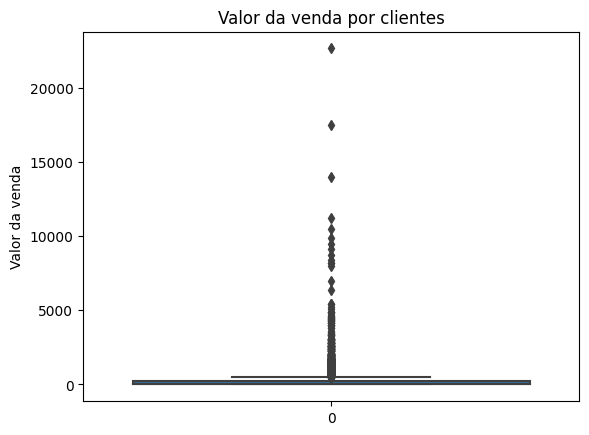

In [7]:
_ = sns.boxplot(sales.Sales)
plt.title('Valor da venda por clientes')
plt.ylabel('Valor da venda')
plt.show()

Percebemos que a maioria dos valores giram em torno de 20~200, porem temos muitos e fortes outliers, chegando a valores ate 22638

In [123]:
# Excluindo a caixa postal pois nao a usaremos e ela possui missing
sales = sales.drop(columns=['Postal Code'])

**Segmentado por regioes geograficas, quais delas tem um maior valor total de compra?**

In [143]:
# Agrupando as vendas por região, estado e cidade
aggregated_sales = sales.groupby(['Region', 'State', 'City'])['Sales'].sum().reset_index()

fig = px.treemap(aggregated_sales,
                 path=['Region', 'State', 'City'],
                 values='Sales',
                 title='Contribuição de Vendas por Região, Estado e Cidade',
                 color='Sales',
                 branchvalues='total')

fig.show()

Essa empresa atua apenas nos USA, sendo suas principais regioes de venda leste o oese, com enfase nos estados de **Los Angeles** e **New York**

**Qual a preferencia de segmento que cada estado tem?**

In [138]:
fig = px.parallel_categories(sales[['Region', 'Category']])
fig.show()

Todos os estados seguem o mesmo padrão, de ter uma preferencia muito maior por office supplies, e ter quase o mesmo numero de vendas para funiture e Technology, apesar da primeira se sobresair na maioria dos casos, talvez seja eficiente investimento em propaganda ou promoções para essas categorias menos procuradas?

**Qual as categorias com maiores valores**

In [150]:
fig = px.box(sales, x='Category', y='Sales')
fig.show()

As categorias com os maiores valores de mercado são furniture e tecnologia, mas em media **Furniture tem um valor medio um pouco maior**, apesar disso, **os produtos de tecnologia tem uma escalabilidade maior em relação ao preço, tendo os outliers mais altos**

# RFV

Vamos montar um dataset com informações de Recência, Frequência, Valor com base no dataset inicial

## **R**ecência

In [8]:
# Vamos criar um dataset com informações da ultima compra de cada cliente
recency = (
    # Vamos agrupar pelo ID do cliente e puxar a data do seu ultimo pedido
    sales[['Customer ID', 'Order Date']].groupby('Customer ID')['Order Date'].max().reset_index()
)
recency.head()

,Customer ID,Order Date
0,AA-10315,2018-06-29
1,AA-10375,2018-11-12
2,AA-10480,2018-04-15
3,AA-10645,2018-05-11
4,AB-10015,2017-10-11


Para representar melhor a recencia, vamos fazer um comparativo: para cada cliente, vamos calcular a diferença(em meses) da sua compra mais recente para a compra mais recente do dataset, sendo assim, o valor da recência será **o número de meses que o cliente está sem comprar**

In [9]:
last_buy = recency['Order Date'].max() # Vamos usar a compra mais recente como referencia na comparação com outros clientes

# Vamos calcular a diferença(em meses) da compra mais recente e da compra feita por cada cliente
def diference_recency(last_date, cliente_date):
  dif = (12 * (last_date.year - cliente_date.year)) + (last_date.month - cliente_date.month)
  return dif

# Criando a coluna da diferença de meses
recency['Recency'] =  recency['Order Date'].apply(
    lambda datetime_val: diference_recency(last_buy, datetime_val) # Aplicamos a função com os parametros da ultima compra registrada com a ultima compra de cada registro
)

recency = recency.drop("Order Date", axis=1)
recency.head()

,Customer ID,Recency
0,AA-10315,6
1,AA-10375,1
2,AA-10480,8
3,AA-10645,7
4,AB-10015,14


In [10]:
recency.shape

(793, 2)

In [11]:
recency.describe()

,Recency
count,793.000000
mean,4.998739
std,6.256411
min,0.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,38.000000


Ao fazer uma analise estatistica sobre os valores da recencia, fica claro que ao olharmos para o valor da media e da mediana, entende-se que --Por conta da media ser bem maior-- temos fortes outliers que estão puxando a media pra cima, vamos verificar melhor isso ao plotar um BOXPLOT

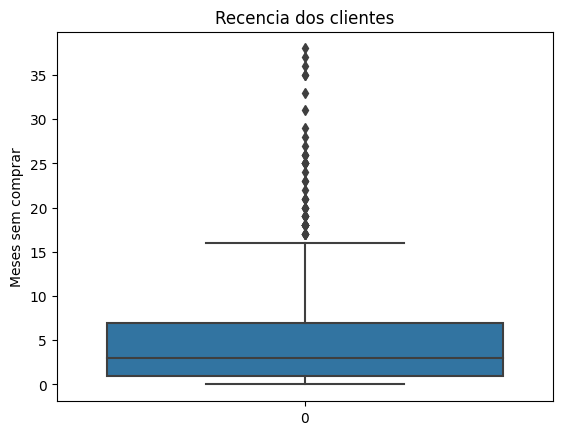

In [12]:
_ = sns.boxplot(recency.Recency)
plt.title('Recencia dos clientes')
plt.ylabel('Meses sem comprar')
plt.show()

Com isso, percebemos que a analise feita inicialmente estava correta, apesar da grande maioria dos valores estarem abaixo de 10, temos fortes outliers(ate 38), ou seja, existem muitos clientes que estão há bastante tempo sem realizar nenhuma compra, talvez possamos classificalos no futuro como inativos ou muito proximo do Churn

Vamos também plotar um histograma para entender onde está a maior parte dos clientes

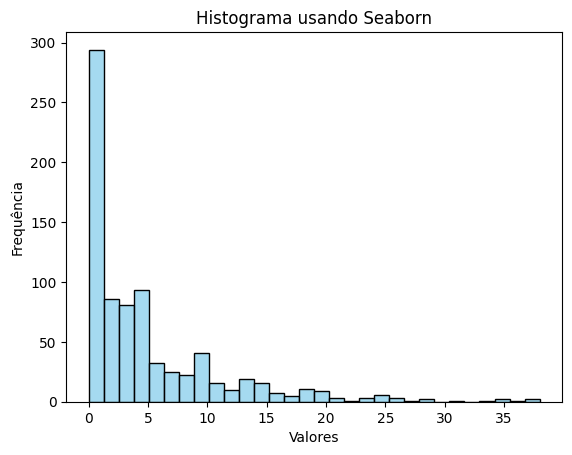

In [13]:
sns.histplot(recency.Recency, kde=False, color='skyblue')
plt.title('Histograma usando Seaborn')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

A grande maioria dos clientes está há poucos meses sem comprar, com o valor com maior quantidade de ocorrencias sendo 0

## **F**requencia / **V**alor

In [14]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Vamos criar um DataSet com duas informações muito importantes, frequencia: Vai ser o numero de vezes que cada cliente fez a compra. MonetaryValue: A media de valor gasto por cada cliente em todas suas compras

In [15]:
# Criando o novo DataSet de frequencia
frequency = sales[['Customer ID', 'Order ID', 'Sales']]

# Agrupando os clientes para possuir o numero de compras feitas por ele
frequency = frequency.groupby('Customer ID')['Order ID', 'Sales'].agg({
    'Order ID': 'count', # Numero de compras feitas por esse cliente
    'Sales': 'mean' # Media do preço pago por ele
})

frequency.reset_index()

# Renomeando para melhor entendimento
frequency = frequency.rename(columns={
    'Order ID': 'Frequency',
    'Sales': 'MonetaryValue'
})

# Arredondando os valores
frequency.MonetaryValue = frequency.MonetaryValue.round(2)

frequency.head()

,Frequency,MonetaryValue
Customer ID,,
AA-10315,11,505.78
AA-10375,15,70.43
AA-10480,12,149.21
AA-10645,18,282.61
AB-10015,6,147.69


In [16]:
frequency.shape

(793, 2)

In [17]:
frequency.describe()

,Frequency,MonetaryValue
count,793.000000,793.000000
mean,12.358134,227.406658
std,6.162600,190.424016
min,1.000000,2.420000
25%,8.000000,115.910000
50%,11.000000,184.050000
75%,16.000000,282.610000
max,35.000000,1751.290000


Possivelmente Frequency terá um boxplot bastante regular, pela proximidade da media e mediana, podendo ter alguns outliers puxando a media pra cima. Por outro lado, MonetaryValue possivelmente terá muitos outliers altos que explicarão a diferença ente media e mediana

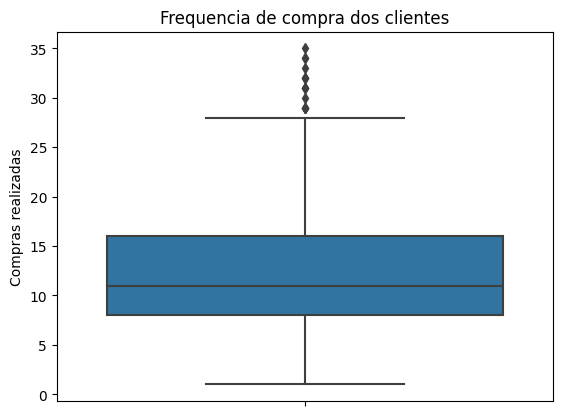

In [18]:
sns.boxplot(data=frequency, y='Frequency')
plt.title('Frequencia de compra dos clientes')
plt.ylabel('Compras realizadas')
plt.show()

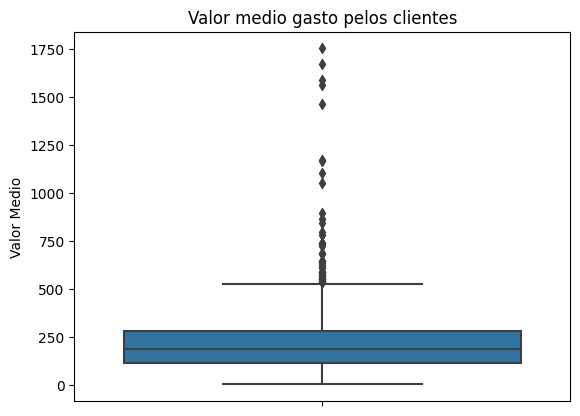

In [19]:
sns.boxplot(data=frequency, y='MonetaryValue')
plt.title('Valor medio gasto pelos clientes')
plt.ylabel('Valor Medio')
plt.show()

## Criando o DataFrame **RFV** final

Faremos um merge entre os dois datasets feitos anteriormente, para juntar as informações de recencia, frequencia e valor e formar o dataset RFV

In [20]:
rfv = recency.merge(frequency, on='Customer ID', how='inner')
rfv.head()

,Customer ID,Recency,Frequency,MonetaryValue
0,AA-10315,6,11,505.78
1,AA-10375,1,15,70.43
2,AA-10480,8,12,149.21
3,AA-10645,7,18,282.61
4,AB-10015,14,6,147.69


In [21]:
rfv.shape

(793, 4)

In [22]:
rfv.isnull().sum()

Customer ID      0
Recency          0
Frequency        0
MonetaryValue    0
dtype: int64

Não tivemos nenhum problema no merge, uma vez que nao encontramos nenhum valor nulo e o df continua com 793 registros, que é o numero de clientes diferentes

## Entendendo o DataSet

Vamos plotar alguns graficos para entender melhor nosso dataset RFV

Relação entre Frequencia X Recencia

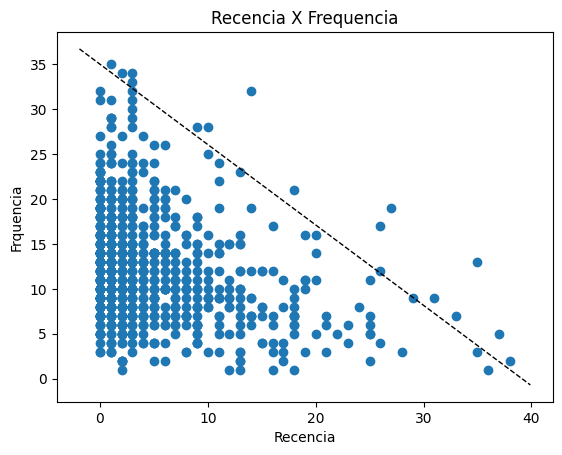

In [114]:
plt.scatter(x = 'Recency', y='Frequency', data=rfv)
plt.plot(plt.xlim(), plt.ylim()[::-1], '--', color='black', linewidth=1)

plt.xlabel('Recencia')
plt.ylabel('Frquencia')
plt.title('Recencia X Frequencia')
plt.show()

não parece existir um padrão muito claro no grafico, vamos ver a correlação entre essas duas features para entender se podemos inferir algo com certeza dessa relação:

In [115]:
correlacao = rfv['Recency'].corr(rfv['Frequency'])
correlacao

-0.2820800661466502

É uma correlação baixa, mas apesar disso, o que podemos inferir desse grafico é, apesar de serem poucos registros, uma parte dos clientes segue uma relação inversamente proporcional entre frequencia e recencia, ou seja, essa parte dos clientes segue a relação de que, quanto mais frequente é o cliente, mais recente foi sua compra

A parte que deveria gerar preocupação, apesar de ser uma pequena parcela, são aqueles que estão no canto inferior direito do gráfico, que possuem baixa frequencia e alta recencia, ou seja, clientes que não compram frequentemente e não fazem compras há bastante tempo, são esses que tem a maior probabilidade de darem Churn

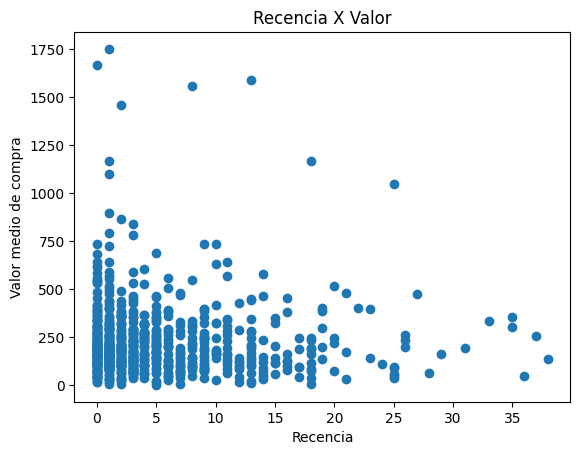

In [118]:
plt.scatter(x = 'Recency', y='MonetaryValue', data=rfv)

plt.xlabel('Recencia')
plt.ylabel('Valor medio de compra')
plt.title('Recencia X Valor')
plt.show()

In [119]:
correlacao = rfv['Recency'].corr(rfv['MonetaryValue'])
correlacao

-0.009322809411327567

Aparentemente a recencia não é um fator muito importante para determinar o valor medio que um cliente gasta na empresa, uma vez que mesmo com o valor de X no grafico aumentando, grande parte dos valores permanecem na mensa faixa de valores

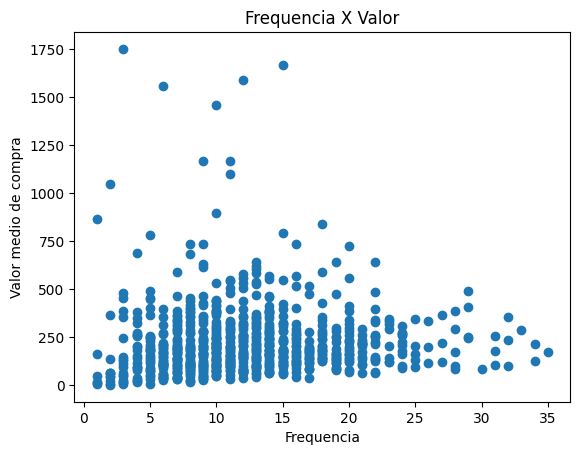

In [120]:
plt.scatter(x = 'Frequency', y='MonetaryValue', data=rfv)
#plt.plot(plt.xlim(), plt.ylim()[::-1], '--', color='black', linewidth=1)

plt.xlabel('Frequencia')
plt.ylabel('Valor medio de compra')
plt.title('Frequencia X Valor')
plt.show()

In [121]:
correlacao = rfv['Frequency'].corr(rfv['MonetaryValue'])
correlacao

0.03545389055458341

Aparentemente a frequencia não é um fator muito importante para determinar o valor medio que um cliente gasta na empresa, uma vez que mesmo com o valor de X no grafico aumentando, grande parte dos valores permanecem na mensa faixa de valores

No geral, as features não apresentam uma correlação muito alta entre elas. As unicas features que tiveram uma relação minimamente alta foram Frequencia e recencia, tendo uma relação inversamente proporcional, apesar de não ser alta e não explicar o comportamente geral dos clientes

In [122]:
correlacao = rfv.corr()
correlacao

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.282080,-0.009323
Frequency,-0.282080,1.000000,0.035454
MonetaryValue,-0.009323,0.035454,1.000000


# Segmentação com Clustering

Vamos usar alguns algoritmos de clustering para tentar segmentar os clientes

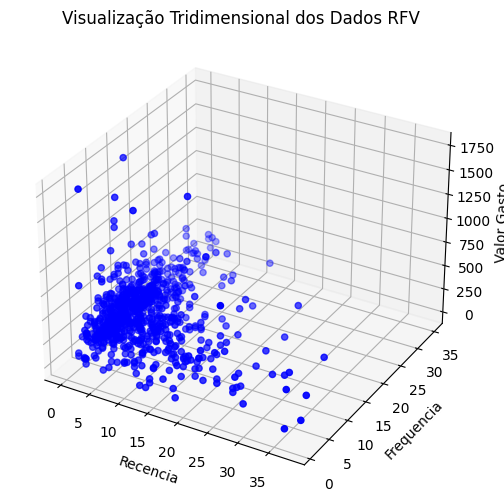

In [23]:
# Vamos visualizar como nossos registros estão distribuidos
from mpl_toolkits.mplot3d import Axes3D

# Suponha que 'dados' seja o seu DataFrame com as três colunas
# 'coluna1', 'coluna2' e 'coluna3'

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Substitua 'coluna1', 'coluna2' e 'coluna3' pelos nomes reais das suas colunas
ax.scatter(rfv['Recency'], rfv['Frequency'], rfv['MonetaryValue'], c='blue', marker='o')

ax.set_xlabel('Recencia')
ax.set_ylabel('Frequencia')
ax.set_zlabel('Valor Gasto')

plt.title('Visualização Tridimensional dos Dados RFV')
plt.show()

Aparentemente os dados estão muito uniformes, talvez o KMeans não funcione tão bem

Antes de aplicar o KMeans, precisamos escalonar os dados, por se tratar de um algoritmo que mede distancias, para isso, vamos criar um DF auxiliar, para que nosso DF permaneca com os dados iniciais para melhor interpretação

In [24]:
# Escalonar os dados é de suma importancia para o KMeans
from sklearn.preprocessing import StandardScaler

features = ['Recency',	'Frequency',	'MonetaryValue']
# Criamos esse df auxiliar para que ao final da clusterizão a gente possua o df com os dados antes de escalonar, para passar para a gerencia, por exemplo
rfv_scaled = rfv.copy()

scaler = StandardScaler()
scaler.fit(rfv[features]) # Treinamos nos dados originais

# Transformamos as features e jogamos no dataset escalonado
scaler_features = scaler.transform(rfv[features])
rfv_scaled[features] = scaler_features

Vamos aplicar o metodo do cotovelo

## KMeans

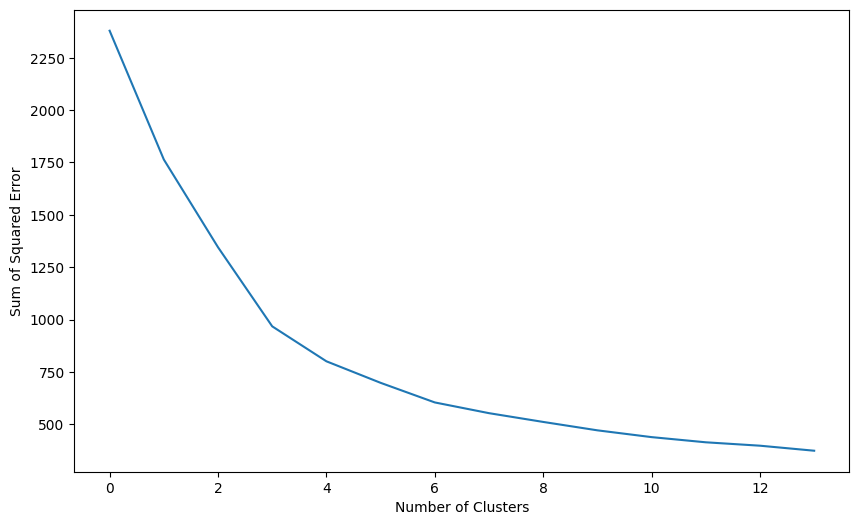

In [25]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfv_scaled[features])
    sse.append(kmeans.inertia_)


# Elbow method plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sse)
# plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()


Na teoria, a quantidade de cluster mais apropriada para esse conjunto de dados seria 3, porem para o mundo dos negicios talvez seja uma segmentação com poucos grupos, o ideal seria testar algum valor entre 3~6

Vamos otimizar o KMeans para obter os melhores parametros

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer

param_grid = {
    'n_clusters': [3, 4, 5, 6],  # Valores de k que você deseja testar
    'init': ['k-means++', 'random'],  # Métodos de inicialização dos centróides
    'max_iter': [100, 300, 500],  # Número máximo de iterações
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerância de convergência
    'algorithm': ['auto', 'full', 'elkan']  # Algoritmo utilizado ('auto', 'full' ou 'elkan')
}

kmeans = KMeans()
# Crie o objeto GridSearchCV
scorer = make_scorer(silhouette_score, greater_is_better=False)
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring=scorer, cv=5)

# Execute a pesquisa em grade nas características selecionadas
grid_search.fit(rfv_scaled[features])

# Obtenha os melhores parâmetros e pontuação
best_k = grid_search.best_params_

print(f"Melhor número de clusters (k): {best_k}")

Melhor número de clusters (k): {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'tol': 0.001}


In [97]:
# Treinando
parametros = {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'tol': 0.001}
kmeans = KMeans(**parametros)
kmeans.fit(rfv_scaled[features])  # Não usaremos o ID do cliente para o treinamento pois ele nao diz nada sobre o agrupamento

# Atribuindo rotulos ao DF
rfv['Cluster'] = kmeans.labels_ # Ao DF inicial
rfv.head()

,Customer ID,Recency,Frequency,MonetaryValue,Cluster
0,AA-10315,6,11,505.78,3
1,AA-10375,1,15,70.43,0
2,AA-10480,8,12,149.21,0
3,AA-10645,7,18,282.61,1
4,AB-10015,14,6,147.69,2


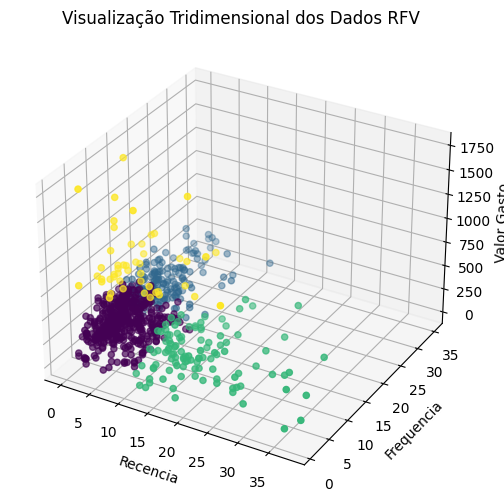

In [98]:
# Vamos visualizar como nossos registros estão distribuidos
from mpl_toolkits.mplot3d import Axes3D

# Suponha que 'dados' seja o seu DataFrame com as três colunas
# 'coluna1', 'coluna2' e 'coluna3'

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Substitua 'coluna1', 'coluna2' e 'coluna3' pelos nomes reais das suas colunas
ax.scatter(rfv['Recency'], rfv['Frequency'], rfv['MonetaryValue'], c=rfv['Cluster'], marker='o')

ax.set_xlabel('Recencia')
ax.set_ylabel('Frequencia')
ax.set_zlabel('Valor Gasto')

plt.title('Visualização Tridimensional dos Dados RFV')
plt.show()

In [99]:
rfv.describe()

,Recency,Frequency,MonetaryValue,Cluster
count,793.000000,793.000000,793.000000,793.000000
mean,4.998739,12.358134,227.406658,0.693569
std,6.256411,6.162600,190.424016,0.921500
min,0.000000,1.000000,2.420000,0.000000
25%,1.000000,8.000000,115.910000,0.000000
50%,3.000000,11.000000,184.050000,0.000000
75%,7.000000,16.000000,282.610000,1.000000
max,38.000000,35.000000,1751.290000,3.000000


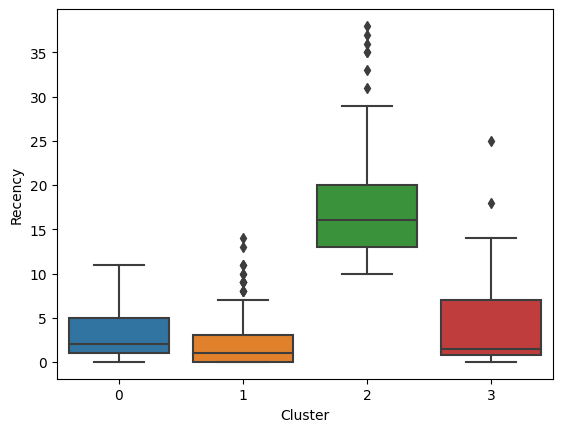

In [100]:
_ = sns.boxplot(x='Cluster', y='Recency', data=rfv)

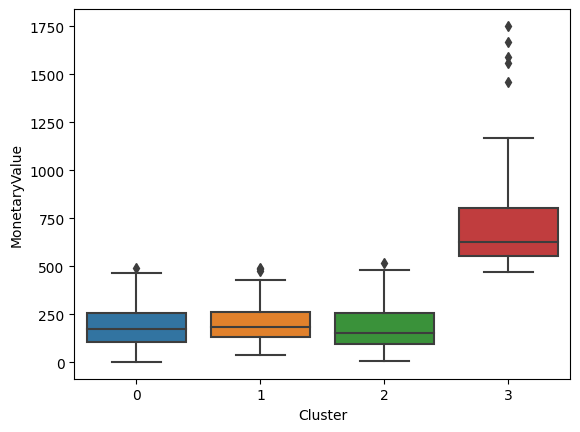

In [101]:
_ = sns.boxplot(x='Cluster', y='MonetaryValue', data=rfv)

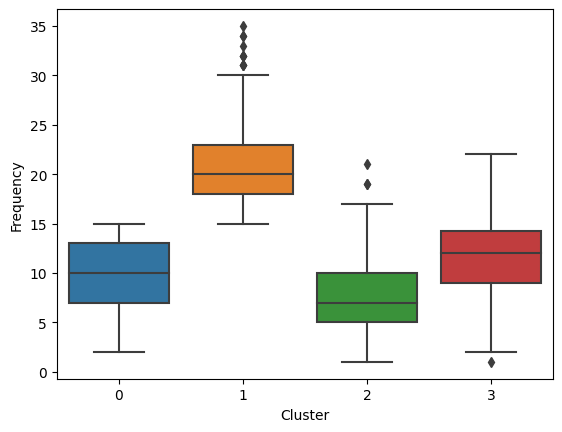

In [102]:
_ = sns.boxplot(x='Cluster', y='Frequency', data=rfv)

In [106]:
# Vamos verificar as metricas por cluster
analise_grupos = (
    rfv.groupby("Cluster")
  [["Customer ID", "Recency", "Frequency", "MonetaryValue"]]
    .agg(
        {
          "Customer ID": "nunique",
          "Recency": "mean",
          "Frequency": "mean",
          "MonetaryValue": "mean",
        }
    )
    .reset_index()
)

# Renomeamos a feature Customer ID
analise_grupos = analise_grupos.rename(columns={"Customer ID": "Clientes Unicos"})

# Vamos ordenar por recencia
analise_grupos.sort_values(by="MonetaryValue", ascending=False)

,Cluster,Clientes Unicos,Recency,Frequency,MonetaryValue
3,3,48,4.250000,11.791667,766.687708
1,1,190,2.442105,20.826316,203.359421
0,0,447,3.116331,9.894855,189.321119
2,2,108,17.620370,7.907407,187.663333


In [108]:
rfv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    793 non-null    object 
 1   Recency        793 non-null    int64  
 2   Frequency      793 non-null    int64  
 3   MonetaryValue  793 non-null    float64
 4   Cluster        793 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 34.1+ KB


Os insights que podemos tirar desse modelo é que ele dividiu nos seguintes grupos: Clientes VIP, Possiveis Churn, Clientes engajados e CLientes regulares, em que todos seus atributos estão em um meio termo, nao possuem alta ou baixa caracteristica em nenhuma das letras do RFV

In [110]:
# Vamos dar nome aos bois(substituir a coluna cluster de numeros para caracteristicas)
mapeamento = {
    0: 'Cliente Regular',
    1: 'Comprador Frequente',
    2: 'Possível Churn',
    3: 'Clientes VIP'
}

rfv['Cluster'] = rfv['Cluster'].map(mapeamento)
rfv.head()

,Customer ID,Recency,Frequency,MonetaryValue,Cluster
0,AA-10315,6,11,505.78,Clientes VIP
1,AA-10375,1,15,70.43,Cliente Regular
2,AA-10480,8,12,149.21,Cliente Regular
3,AA-10645,7,18,282.61,Comprador Frequente
4,AB-10015,14,6,147.69,Possível Churn


## DBscan

In [87]:
from sklearn import metrics

eps_values = np.arange(0.1, 0.9, 0.1)
min_samples_values = range(1, 10)

# Inicializando os melhores parametros que serão retornaros como None
best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(rfv_scaled[features])

        # Apenas calculando o Coeficiente de Silhueta para clusterizações com mais de 1 cluster e menos que o número total de pontos
        if len(set(labels)) > 1 and -1 in labels:
            score = metrics.silhouette_score(rfv_scaled[features], labels) # silhouette
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"Melhor eps: {best_eps}")
print(f"Melhor min_samples: {best_min_samples}")
print(f"Melhor Coeficiente de Silhueta: {best_score}")

Melhor eps: 0.8
Melhor min_samples: 4
Melhor Coeficiente de Silhueta: 0.5655462295035792


In [78]:
rfv.head()

,Customer ID,Recency,Frequency,MonetaryValue,Cluster
0,AA-10315,6,11,505.78,2
1,AA-10375,1,15,70.43,3
2,AA-10480,8,12,149.21,3
3,AA-10645,7,18,282.61,0
4,AB-10015,14,6,147.69,1


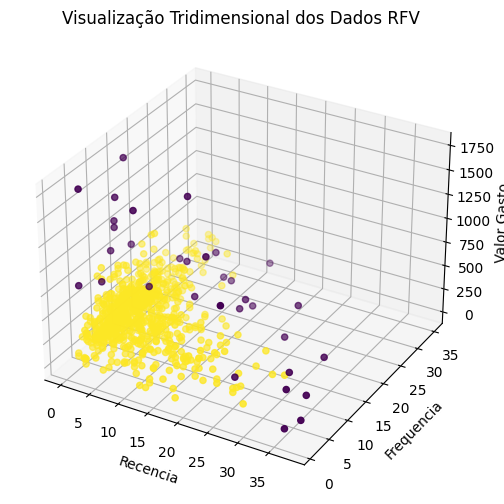

In [88]:
from sklearn.cluster import DBSCAN

rfv = rfv.drop(columns=['Cluster'])

dbscan = DBSCAN(eps=0.8, min_samples=4)
cluster_labels_dbscan = dbscan.fit_predict(rfv_scaled[features])

rfv['Cluster'] = cluster_labels_dbscan
# Plotando os resultados
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Substitua 'coluna1', 'coluna2' e 'coluna3' pelos nomes reais das suas colunas
ax.scatter(rfv['Recency'], rfv['Frequency'], rfv['MonetaryValue'], c=rfv['Cluster'], marker='o')

ax.set_xlabel('Recencia')
ax.set_ylabel('Frequencia')
ax.set_zlabel('Valor Gasto')

plt.title('Visualização Tridimensional dos Dados RFV')
plt.show()

In [89]:
# Vamos verificar as metricas por cluster
centroid_df = (
    rfv.groupby("Cluster")
  [["Customer ID", "Recency", "Frequency", "MonetaryValue"]]
    .agg(
        {
          "Customer ID": "nunique",
          "Recency": "mean",
          "Frequency": "mean",
          "MonetaryValue": "mean",
        }
    )
    .reset_index()
)

# Renomeamos a feature Customer ID
centroid_df = centroid_df.rename(columns={"Customer ID": "N_Clients"})

# Vamos ordenar por recencia
centroid_df.sort_values(by="Recency", ascending=True)

,Cluster,N_Clients,Recency,Frequency,MonetaryValue
1,0,760,4.539474,12.380263,206.321553
0,-1,33,15.575758,11.848485,713.003030


Não conseguimos identificar grupos bem definidos